In [1]:
import neurokit2 as nk
import mne
import os
import os.path as op
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import re
import numpy
from statsmodels.stats.anova import AnovaRM
from mne.time_frequency import tfr_morlet

In [53]:
kdata = pd.read_csv(f'D:/hse/psychodelic_like_experience/data_processing/k_topo_base_log_mid_norm.csv', header = 0)
cdata =  pd.read_csv(f'D:/hse/psychodelic_like_experience/data_processing/CC_topo_base_log_mid_norm.csv', header = 0)
hdata = pd.read_csv(f'D:/hse/psychodelic_like_experience/data_processing/HC_topo_base_log_mid_norm.csv', header = 0)
fdata = pd.read_csv(f'D:/hse/psychodelic_like_experience/data_processing/Fr_topo_base_log_mid_norm.csv', header = 0)

In [54]:
columns_to_delete = ['Unnamed: 0']
cdata = cdata.drop(columns=columns_to_delete)
fdata = fdata.drop(columns=columns_to_delete)
kdata = kdata.drop(columns=columns_to_delete)
hdata = hdata.drop(columns=columns_to_delete)


In [55]:
h_c = hdata.subtract(cdata)
f_k = fdata.subtract(kdata)

In [16]:
raw = mne.io.read_raw_brainvision("D:/hse/psychodelic_like_experience/subjects/DE21/DE21.vhdr", preload=True)
raw.set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'})
raw = raw.rename_channels(mapping = {'FP2' : 'Fp2'})
raw.set_montage(montage='standard_1020')

events = mne.read_events('D:/hse/psychodelic_like_experience/data_processing/events/AS32_eve.txt')
epochs = mne.Epochs(raw, events, tmin=0, tmax=0.006, baseline=None, preload = True)
temp = epochs.average()

Extracting parameters from D:/hse/psychodelic_like_experience/subjects/DE21/DE21.vhdr...
Setting channel info structure...
Reading 0 ... 802799  =      0.000 ...  1605.598 secs...
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 20 events and 4 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


C:\Users\User\AppData\Local\Temp\ipykernel_256\781786672.py:2: RuntimeWarning: The unit for channel(s) KGR, pletism has changed from V to NA.
  raw.set_channel_types({'VEOG': 'eog', 'HEOG' : 'eog', 'mark': 'stim', 'pletism':'misc', 'KGR':'misc'})


In [25]:
h_c

,delta,theta,alpha,beta
0,0.533712,0.346165,0.548834,0.194824
1,1.565995,0.644208,-0.007482,0.225136
2,0.932172,0.458224,-0.242371,1.112664
3,2.470512,-0.486804,0.160106,0.539291
4,0.294461,-0.922779,-0.798284,0.548653
5,0.664760,-0.274824,-0.234781,0.438728
6,-0.840698,-0.687214,0.750589,0.294395
7,-0.461282,-0.890443,-0.289169,0.660360
8,-1.052860,-1.159615,0.227692,0.849232
9,-0.701401,-0.983328,0.916407,0.425683


In [56]:
temp.data = h_c.values

In [22]:
temp.times

array([0.   , 0.002, 0.004, 0.006])

In [57]:
    fig = temp.plot_topomap(times=temp.times,  ch_type='eeg', scalings = 1, units = 'dB', show = False,  time_unit='s', colorbar = True, extrapolate = "head")
    fig.suptitle('HoneyComb - CubesControl',  fontsize=16, fontweight='bold')
    titles = ['delta','theta', 'alpha', 'beta']
    # Set titles for subplots
    for ax, title in zip(fig.axes, titles):
        ax.set_title(title)
    fig
    fig.savefig(f'D:/hse/psychodelic_like_experience/data_processing/pics/honey_cubes_base_log_mid_norm.png')

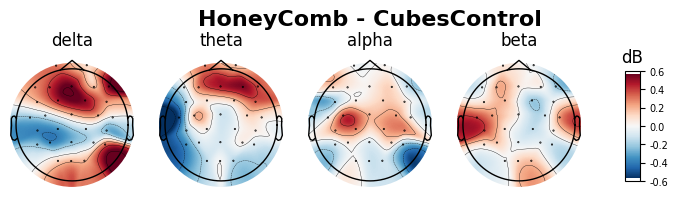

In [58]:
fig

In [14]:
f_k.values

array([[ 1.2517320e-13,  1.1851700e-14, -7.6870000e-15, -1.5614030e-13],
       [-6.9486800e-14,  5.6543000e-14,  2.5913100e-13, -3.2047653e-14],
       [ 8.3070000e-16, -3.2285300e-14,  1.3915860e-13, -1.3345810e-13],
       [-6.3070570e-13,  5.4429500e-14,  1.9172700e-13, -5.4930220e-14],
       [ 1.1630890e-13, -4.2122800e-14,  5.7265800e-14, -2.3123710e-15],
       [ 1.9471830e-13, -3.1116100e-14, -1.1090000e-13, -3.9900070e-14],
       [ 2.0336090e-13, -1.4612350e-13, -2.6116500e-13, -2.4702380e-14],
       [-1.9926420e-13, -3.5589400e-14,  1.2702700e-14, -1.4093100e-14],
       [ 1.3454500e-14, -2.1897630e-13,  3.4210000e-14, -1.0020000e-15],
       [ 3.5068100e-14, -4.9367710e-13, -2.4441000e-14, -1.8454000e-15],
       [-5.4621900e-14, -8.8192430e-13,  5.3219700e-13,  7.4884000e-15],
       [ 2.1773250e-13, -5.0456000e-13,  7.1791900e-13,  9.2336000e-15],
       [ 2.3902720e-13,  4.2331000e-15,  3.0726800e-13,  2.3444800e-14],
       [ 3.9136770e-13, -5.1192700e-14,  1.5608530e

In [59]:
temp.data = f_k.values

In [60]:
    fig = temp.plot_topomap(times=temp.times,  ch_type='eeg', scalings = 1, units = 'dB', show = False,  time_unit='s', colorbar = True, extrapolate = "head")
    fig.suptitle('Fractal - kaleidoscope',  fontsize=16, fontweight='bold')
    titles = ['delta','theta', 'alpha', 'beta']
    # Set titles for subplots
    for ax, title in zip(fig.axes, titles):
        ax.set_title(title)
    fig
    fig.savefig(f'D:/hse/psychodelic_like_experience/data_processing/pics/fractal_kaleidoscope_base_log_mid_norm.png')

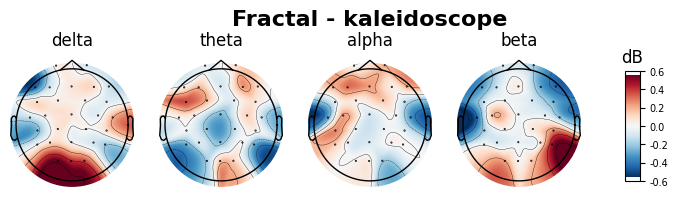

In [61]:
fig